In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score



The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


### Importing the file

In [2]:
file_path = '/home/sivabharathi/PycharmProjects/ACM_Task_Sivabharathi/task-01/datasheet/Mall_Customers.csv'

mall_data = pd.read_csv(file_path)
mall_data.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
95,96,Male,24,60,52
96,97,Female,47,60,47
97,98,Female,27,60,50
98,99,Male,48,61,42


### Preprocessing

In [3]:
mall_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
mall_data_drop = mall_data.drop(['CustomerID', 'Gender'], axis=1)
X = mall_data[['Age', 'Spending Score (1-100)','Annual Income (k$)']]


### using the standardScalar

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Using the elbow method

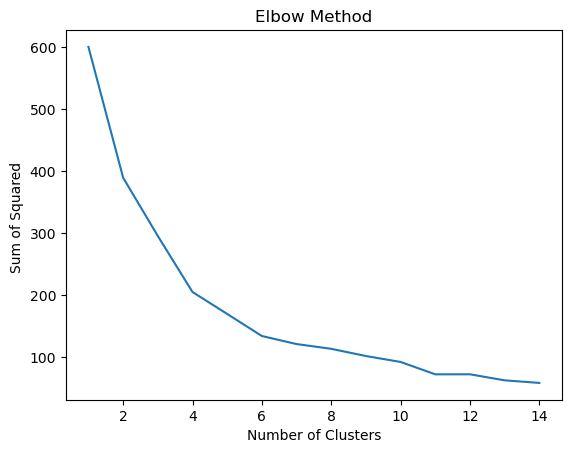

In [6]:
#Elbow method -> cluster finding
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_) 


plt.plot(range(1, 15), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared ')
plt.title('Elbow Method')
plt.show()



In [7]:
# Reducing a 3 features to 2 features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


### Using the Kmeans


In [8]:

kmeans = KMeans(n_clusters=6, random_state=42)
k_mall_data = kmeans.fit_predict(X_pca )


### Quality of the Data

In [10]:
#Silhouette Score
silhouette_avg = silhouette_score(X, k_mall_data)
print(f'Silhouette Score: {silhouette_avg:.3f}')

#DaviesBouldinIndex
db_index = davies_bouldin_score(X, k_mall_data)
print(f'Davies-Bouldin Index: {db_index:.3f}')

#Inertia 
inertia = kmeans.inertia_
print(f'Inertia: {inertia:.3f}')

Silhouette Score: 0.355
Davies-Bouldin Index: 0.939
Inertia: 84.862


Text(0, 0.5, 'Spending Score or Age')

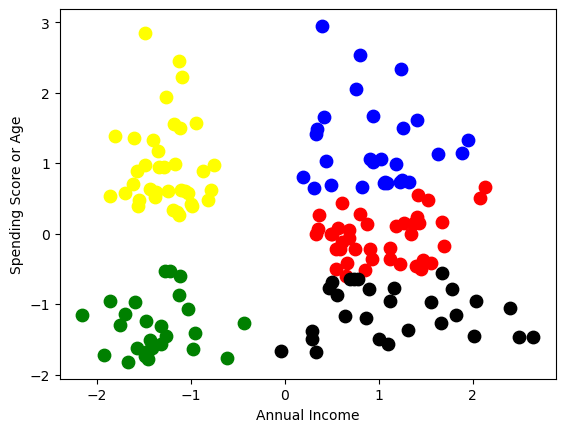

In [11]:

plt.scatter(X_pca[k_mall_data == 0,0], X_pca[k_mall_data == 0,1], s=80, c='red',label='Customer 1')
plt.scatter(X_pca[k_mall_data == 1,0], X_pca[k_mall_data == 1,1], s=80, c='yellow',label='Customer 2')
plt.scatter(X_pca[k_mall_data == 2,0], X_pca[k_mall_data == 2,1], s=80, c='green',label='Customer 3')
plt.scatter(X_pca[k_mall_data == 3,0], X_pca[k_mall_data == 3,1], s=80, c='blue',label='Customer 4')
plt.scatter(X_pca[k_mall_data == 4,0], X_pca[k_mall_data == 4,1], s=80, c='black',label='Customer 5')

plt.xlabel("Annual Income")
plt.ylabel("Spending Score or Age")
